## Script for analysing the pycnocline in Sebasitan Vizcaino Bay. 
##### One section with the bay, one without and one where they are subtracted from eachother to show the difference. 

In [1]:
from xmitgcm import open_mdsdataset
from MITgcmutils import rdmds
from MITgcmutils import mds
from MITgcmutils import diagnostics
import xmitgcm 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dat
from matplotlib.gridspec import GridSpec
from matplotlib import cm
import xarray as xr
import cmocean
import time 
import pylab as pl
import IPython
from IPython import display
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from math import radians, cos, sin, asin, sqrt
import netCDF4 as nc
from scipy.io import savemat
import scipy as sc
import scipy.io as sio
import scipy.signal as sig
import statistics as stat
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
params = {'font.size': 22,
          'figure.figsize': (30, 15),
         'font.family':'serif'}
pl.rcParams.update(params)

In [3]:
%matplotlib inline

In [ ]:
levels =  np.arange(0,76,1)
data_dir='/Volumes/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'
iters =  7200
ds=open_mdsdataset(data_dir,data_dir,prefix=['dynVars'],default_dtype='>f4',levels=levels,read_grid=False,iters=7200) #

In [ ]:
data_dir= 'SVBdata'

In [ ]:
eta = rdmds('SVBdata/eta', 7200)
LAT = rdmds('SVBdata/YC')
LON = rdmds('SVBdata/XC')-360
depth = rdmds('SVBdata/Depth')
Z = rdmds('SVBdata/RC')
hFacC= rdmds('SVBdata/hFacC')


In [30]:
def loadNetCDFs(varname):
    dsw=[]
    dsn=[]
    i=0
    for i in np.arange(0,8,1):

        pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'ACnoSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        pathw='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'+ str(varname)+'ACwithSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'

        dswin  = xr.open_dataset(pathw)
        dsnin = xr.open_dataset(pathn)

        dsw.append(dswin)
        dsn.append(dsnin)

    return dsw, dsn

# Why overwrite Sw and Sn?
def loadSALT(dsw,dsn):
    var23=dsw[0].Sw.values
    var34=dsw[1].Sw.values
    var45=dsw[2].Sw.values
    var56=dsw[3].Sw.values
    var67=dsw[4].Sw.values
    var78=dsw[5].Sw.values
    var89=dsw[6].Sw.values
    var910=dsw[7].Sw.values
    
    Sw=np.concatenate((var23, var34, var45, var56,var67,var78,var89,var910), axis=0)# , ,), axis=0) 
    
    var23n=dsn[0].Sn.values
    var34n=dsn[1].Sn.values
    var45n=dsn[2].Sn.values
    var56n=dsn[3].Sn.values                 
    var67n=dsn[4].Sn.values
    var78n=dsn[5].Sn.values
    var89n=dsn[6].Sn.values
    var910n=dsn[7].Sn.values
    
    Sn=np.concatenate((var23n, var34n, var45n, var56n,var67n,var78n,var89n, var910n), axis=0) #), axis=0) 
    
    time23=dsw[0].time.values.astype(int)
    time34=dsw[1].time.values.astype(int)
    time45=dsw[2].time.values.astype(int)
    time56=dsw[3].time.values.astype(int)
    time67=dsw[4].time.values.astype(int)
    time78=dsw[5].time.values.astype(int)
    time89=dsw[6].time.values.astype(int)
    time910=dsw[7].time.values.astype(int)
    
    Time=np.concatenate((time23, time34, time45, time56,time67, time78,time89, time910), axis=0)#,time89, time910), axis=0)
    
    times=Time*1e-9
    
    return Sw,Sn,times

def loadTHETA(dsw,dsn):
    var23=dsw[0].Tw.values
    var34=dsw[1].Tw.values
    var45=dsw[2].Tw.values
    var56=dsw[3].Tw.values
    var67=dsw[4].Tw.values
    var78=dsw[5].Tw.values
    var89=dsw[6].Tw.values
    var910=dsw[7].Sw.values # Shouldn't this be dsw.Tw.values?
    
    Tw=np.concatenate((var23, var34, var45, var56,var67, var78,var89, var910), axis=0)#,var89, var910), axis=0) 
    
    var23n=dsn[0].Tn.values
    var34n=dsn[1].Tn.values
    var45n=dsn[2].Tn.values
    var56n=dsn[3].Tn.values               
    var67n=dsn[4].Tn.values
    var78n=dsn[5].Tn.values
    var89n=dsn[6].Tn.values
    var910n=dsn[7].Tn.values
    
    Tn=np.concatenate((var23n, var34n, var45n, var56n,var67n, var78n,var89n, var910n), axis=0) #,var89n, var910n), axis=0) 
    
    return Tw,Tn
    
    
        

In [31]:
dsw,dsn=loadNetCDFs('SALT')
dtw,dtn=loadNetCDFs('THETA')

FileNotFoundError: [Errno 2] No such file or directory: b'/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/SALTACwithSVB9_10.nc'

In [10]:
Sw,Sn,times=loadSALT(dsw,dsn)
#Tw,Tn,timet=loadTHETA(dtw,dtn)

In [11]:
#T=Tw-Tn
S=Sw-Sn

In [13]:
#Z=dsw[0].z
X=dsw[0].x
nt = np.size(times)

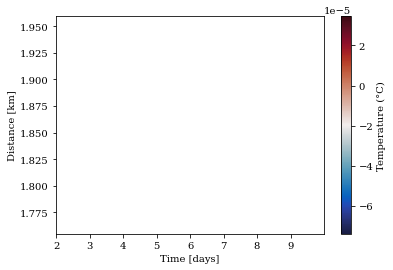

In [25]:
fig,ax = plt.subplots()

vmax=34.5
vmin=33.3

plot_HOVMÖLLER(ax,X,times,S[:,:],'Temperature (°C)',vmin,vmax,fig)


In [14]:
def clinecalc(VAL):
    
    Zip=Z.values
    pyc=np.zeros(np.shape(VAL[:,1,:]))
    deltaz=Zip[1:]-Zip[:-1]
    deltadens=VAL[:,1:,:]-VAL[:,:-1,:]
    place=np.argmin(deltadens[:,:,:]/deltaz[None,:,None],1)
    for i in np.arange(0,len(place[:,1]),1):
        for k in np.arange(0,len(place[1,:]),1):
            pyc[i,k]=Z[place[i,k]]
    return pyc

In [15]:
def plot_HOVMÖLLER(ax,LON,TIME,VAL,title,vmin,vmax,fig):
    #dep_masked = np.ma.masked_values(depth,0) 
    #mask_dep = np.ma.getmask(dep_masked)
    #ax.set_facecolor('wheat')
    xlab='Time [days]'
    ylab='Distance [km]'
    
    time= TIME/(24*60)
    #time=dat.date2num(TIME)
    
    ax.set(xlabel=xlab, ylabel=ylab)
    #ax.set_xticks([2880, 4320, 5760, 7200, 8640, 10080, 11520, 12960, 14400])
    #ax.set_xticklabels([2, 3, 4, 5, 6, 7, 8, 9, 10])

    #val=VAL.values
    cax = ax.pcolormesh(time,LON,np.transpose(VAL),cmap=cmocean.cm.balance)#,vmin=vmin,vmax=vmax) 
    #ax.xaxis.set_major_locator(dat.MonthLocator())
    
    ##FOR THE SAME COLORBAR FOR ALL OF THE PLOTS
    #cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
    #fig.colorbar(cax, cax=cbar_ax)
    #cbar_ax.set_ylabel(title)
    
    ##FOR A COLORBAR FOR EACH PLOT
    cbar = plt.colorbar(cax)
    cbar.set_label(title)
    

In [70]:
def density_calc(T,S,Z):
    rhoref = rdmds('/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/RhoRef')
    #T0=T[0,:,:,:]
    #S0=S[0,:,:,:]
    dens=[]
    cs=1490 #Reference sound speed m/s
    tAlpha=2e-4 #Thermal expansion coeffiecent K^-1
    sBeta=7.4e-4 #Haline contraction coeffiecent ppt^-1
    
    dens=np.zeros(np.shape(S))
    for i in np.arange(0,len(S),1):
        dens[i,:,:]= rhoref[:71,0,:]*(1-tAlpha*T[i,:,:]+sBeta*S[i,:,:])#
    return dens

In [229]:
dens=density_calc(Tfilt,Sfilt,Z)

In [126]:
halocline=clinecalc(S)
thermocline=clinecalc(T)
pycnocline=clinecalc(dens)

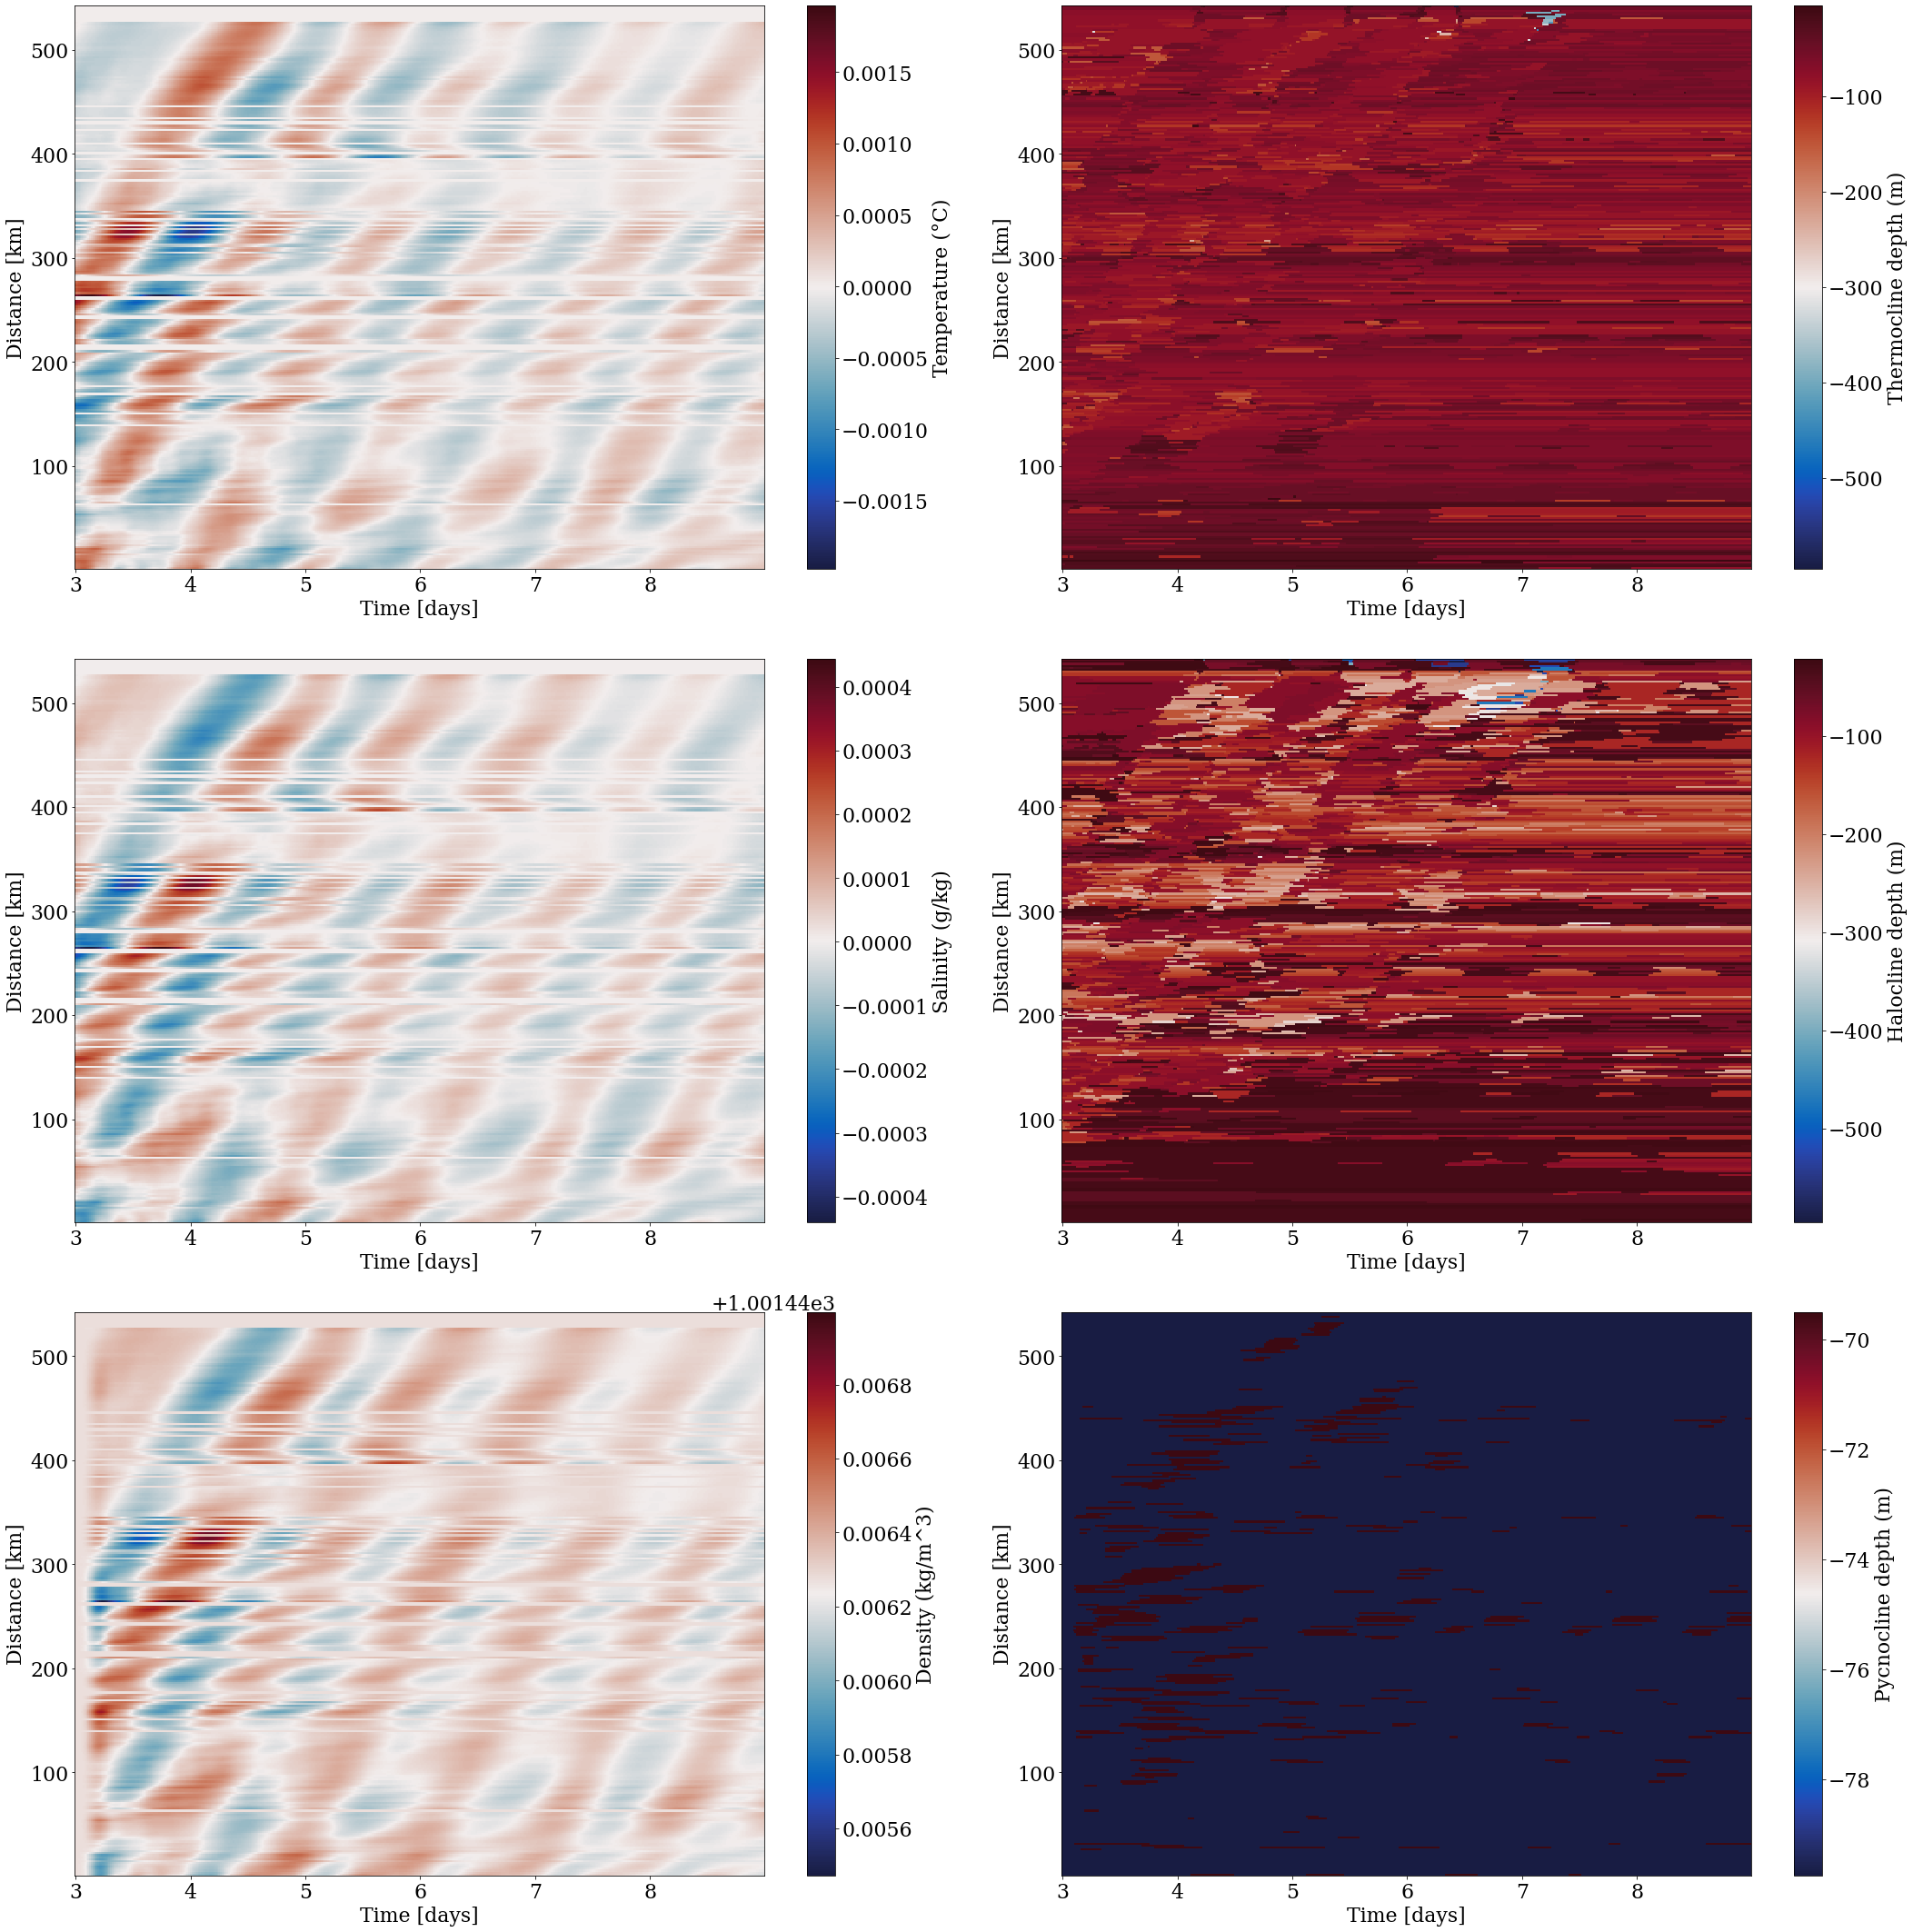

In [245]:
fig = plt.figure(figsize=(30, 30))
gs = GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 1])

vmax=34.5
vmin=33.3

ax0 = fig.add_subplot(gs[0, 0])
plot_HOVMÖLLER(ax0,X[:290],times,sig.detrend(T[:,37,:290],0),'Temperature (°C)',vmin,vmax,fig)
ax1 = fig.add_subplot(gs[1, 0])
plot_HOVMÖLLER(ax1,X[:290],times,sig.detrend(S[:,37,:290],0),'Salinity (g/kg)',vmin,vmax,fig) 
ax2 = fig.add_subplot(gs[2, 0])
plot_HOVMÖLLER(ax2,X[:290],times,dens[:,37,:290],'Density (kg/m^3)',vmin,vmax,fig)

ax3 = fig.add_subplot(gs[0, 1])
plot_HOVMÖLLER(ax3,X[:290],times,thermocline[:,:290],'Thermocline depth (m)',vmin,vmax,fig)
ax4 = fig.add_subplot(gs[1 , 1])
plot_HOVMÖLLER(ax4,X[:290],times,halocline[:,:290],'Halocline depth (m)',vmin,vmax,fig) 
ax5 = fig.add_subplot(gs[2, 1])
plot_HOVMÖLLER(ax5,X[:290],times,pycnocline[:,:290],'Pycnocline depth (m)',vmin,vmax,fig)

fig.tight_layout()


IndexError: index 420 is out of bounds for axis 1 with size 413

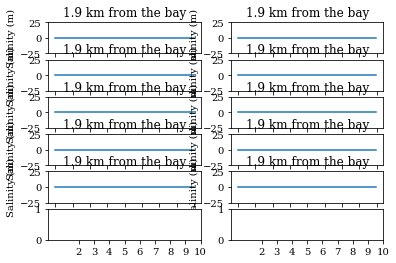

In [18]:
fig,ax=plt.subplots(6,2)

d=42
xlab='Time (days)'
ylab='Salinity (m)'
distance=X.values
VAL=S[:,:]
ylim= [-25, 25]
t=(np.arange(len(times))*20)+2880

plt.setp(ax, xticks=[2880, 4320, 5760, 7200, 8640, 10080, 11520, 12960, 14400,], xticklabels=[2, 3, 4, 5, 6, 7, 8, 9, 10])

ax[0,0].plot(t, VAL[:,0])
ax[0,0].set(xlabel=xlab, ylabel=ylab)
ax[0,0].set_title('%1.1f km from the bay' %distance[d*0])
ax[0,0].set_ylim(ylim)

ax[0,1].plot(t, VAL[:,d])
ax[0,1].set(xlabel=xlab, ylabel=ylab)
ax[0,1].set_title('%1.1f km from the bay' %distance[d*1])
ax[0,1].set_ylim(ylim)

ax[1,0].plot(t, VAL[:,d*2])
ax[1,0].set(xlabel=xlab, ylabel=ylab)
ax[1,0].set_title('%1.1f km from the bay' %distance[d*2])
ax[1,0].set_ylim(ylim)

ax[1,1].plot(t, VAL[:,d*3])
ax[1,1].set(xlabel=xlab, ylabel=ylab)
ax[1,1].set_title('%1.1f km from the bay' %distance[d*3])
ax[1,1].set_ylim(ylim)

ax[2,0].plot(t, VAL[:,d*4])
ax[2,0].set(xlabel=xlab, ylabel=ylab)
ax[2,0].set_title('%1.1f km from the bay' %distance[d*4])
ax[2,0].set_ylim(ylim)

ax[2,1].plot(t, VAL[:,d*5])
ax[2,1].set(xlabel=xlab, ylabel=ylab)
ax[2,1].set_title('%1.1f km from the bay' %distance[d*5])
ax[2,1].set_ylim(ylim)

ax[3,0].plot(t, VAL[:,d*6])
ax[3,0].set(xlabel=xlab, ylabel=ylab)
ax[3,0].set_title('%1.1f km from the bay' %distance[d*6])
ax[3,0].set_ylim(ylim)

ax[3,1].plot(t, VAL[:,d*7])
ax[3,1].set(xlabel=xlab, ylabel=ylab)
ax[3,1].set_title('%1.1f km from the bay' %distance[d*7])
ax[3,1].set_ylim(ylim)

ax[4,0].plot(t, VAL[:,d*8])
ax[4,0].set(xlabel=xlab, ylabel=ylab)
ax[4,0].set_title('%1.1f km from the bay' %distance[d*8])
ax[4,0].set_ylim(ylim)

ax[4,1].plot(t, VAL[:,d*9])
ax[4,1].set(xlabel=xlab, ylabel=ylab)
ax[4,1].set_title('%1.1f km from the bay' %distance[d*9])
ax[4,1].set_ylim(ylim)

ax[5,0].plot(t, VAL[:,d*10])
ax[5,0].set(xlabel=xlab, ylabel=ylab)
ax[5,0].set_title('%1.1f km from the bay' %distance[d*10])
ax[5,0].set_ylim(ylim)

ax[5,1].plot(t, VAL[:,d*11])
ax[5,1].set(xlabel=xlab, ylabel=ylab)
ax[5,1].set_title('%1.1f km from the bay' %distance[d*11])
ax[5,1].set_ylim(ylim)

fig.tight_layout()


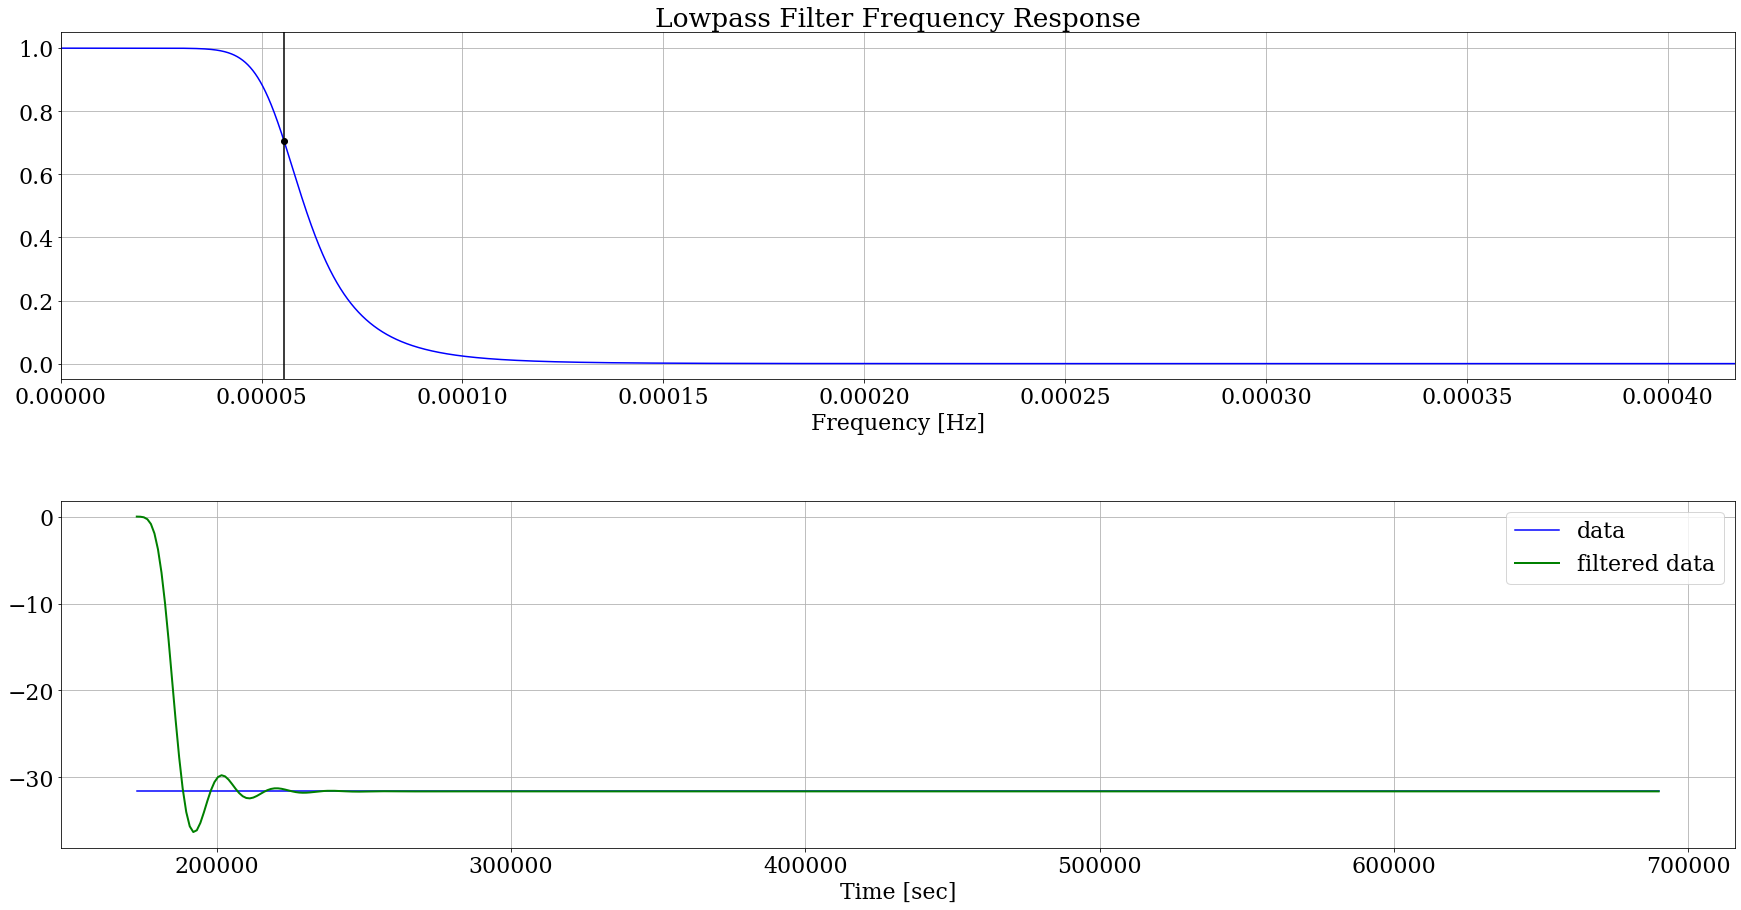

In [254]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = sig.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = sig.lfilter(b, a, data,axis=0)
    return y


# Setting standard filter requirements.
order = 6
fs = 1/1200       
cutoff =1/18000

b, a = butter_lowpass(cutoff, fs, order)

# Plotting the frequency response.
w, h = sig.freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Creating the data for filteration
tym=(np.arange(len(times))*20)+2880
t=tym*60

data = halocline[:,:]

# Filtering and plotting
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data[:,20], 'b-', label='data')
plt.plot(t, y[:,20], 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [246]:
halofilt=np.zeros(np.shape(halocline))
#for d in np.arange(np.size(halocline,1)):
data = sig.detrend(halocline[:,:],0)
    # Filtering and plotting
halofilt[:,:] = butter_lowpass_filter(data, cutoff, fs, order)

In [ ]:
def plot_above(ax,LON,LAT, VAL,title):
    
    xlab='Longitude [°]'
    ylab='Latitude [°]'
    
    
    ax.set_facecolor('wheat')
    cax = ax.pcolormesh(LON,LAT,VAL,cmap=cmocean.cm.balance)
    ax.set_title(title)
    cbar_ax = plt.colorbar(cax, ax=ax)
    ax.set(xlabel=xlab, ylabel=ylab)
    cbar_ax.set_label(title)
    ax.set_xlim(-122,-114) 
    ax.set_ylim(27,35.3)
    
def plot_sideP(ax,LON,Z,VAL,title):
    
    xlab='Longitude [°]'
    ylab='Depth (m)'
    minv = -0.0005
    maxv = 0.0005
    
    ax.set_facecolor('tan')
    ax.axhline(0, color='0.7')
    cax = ax.pcolormesh(LON, Z,VAL
                      ,cmap=cmocean.cm.curl, vmin=minv,vmax=maxv, zorder=1)
    #ax.contour(LON, Z,VAL, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax.set_title(title)
    cbar_ax = plt.colorbar(cax, ax=ax)
    ax.set(xlabel=xlab, ylabel=ylab)
    cbar_ax.set_label(title)